In [125]:
# !pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import date


In [4]:

# Set start and end date
start_date = '1990-01-01'
end_date = date.today()

# Set ticker
ticker = 'NQ=F'

df = yf.download(ticker, start_date, end_date)


[*********************100%***********************]  1 of 1 completed


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-10,13050.00,13408.00,12982.00,13392.00,13392.00,602069
2022-08-11,13380.50,13575.00,13285.00,13311.25,13311.25,614816
2022-08-12,13344.25,13583.25,13312.00,13577.75,13577.75,500647
2022-08-15,13571.50,13706.00,13495.25,13681.25,13681.25,463768
2022-08-16,13674.75,13740.75,13522.75,13658.25,13658.25,463768


In [6]:
df.reset_index(inplace = True)
df.columns = df.columns.str.lower()
df.to_csv("nq historical data.csv")

In [7]:
# Create 7 Day normalized price Column
df['7 day normalized'] = (df['close']-df['close'].rolling(7).min())/(df['close'].rolling(7).min()-df['close'].rolling(7).max())

In [8]:
# Create 7 Z Day normalized price Column
df['7 day z normalized'] = (df['close']-df['close'].rolling(7).mean())/(df['close'].rolling(7).std())


In [157]:
# create a trend rank column to rank the days of gaining or losing based on greater than previous close column

df['trend rank'] = df.groupby((df['greater than previous close']\
                               != df['greater than previous close'].shift()).cumsum()).cumcount()+1

In [36]:
#Create day of week column
df['day of week'] = df['date'].dt.weekday

In [12]:
# Create boolean column for if close price > than previous close price
df['greater than previous close'] = df['close']>df['close'].rolling(2).min()


In [13]:
df['shifted greater than previous close'] = df['greater than previous close'].shift(-1)
df['shifted greater than previous close'] = df['shifted greater than previous close'].astype('bool')                                                

In [153]:
# Create list of columns for reordering column position
columns = ['date', 'open', 'high', 'low', 'close', 'adj close', 'volume',
       '7 day normalized', '7 day z normalized', 'greater than previous close','trend rank',
       'shifted greater than previous close', 'day of week']

In [154]:
# Reorder columns
df = df[columns]

In [177]:
df

,date,open,high,low,close,adj close,volume,7 day normalized,7 day z normalized,greater than previous close,trend rank,shifted greater than previous close,day of week
0,2000-09-18,3721.00,3785.50,3602.00,3653.50,3653.50,72994,NaN,NaN,False,1,True,0
1,2000-09-19,3658.50,3817.00,3656.00,3804.00,3804.00,70029,NaN,NaN,True,1,True,1
2,2000-09-20,3801.50,3874.00,3715.50,3853.00,3853.00,78832,NaN,NaN,True,2,False,2
3,2000-09-21,3852.00,3874.00,3744.00,3765.00,3765.00,70719,NaN,NaN,False,1,True,3
4,2000-09-22,3673.00,3780.00,3615.00,3776.00,3776.00,55926,NaN,NaN,True,1,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,2022-08-10,13050.00,13408.00,12982.00,13392.00,13392.00,602069,-1.000000,1.199902,True,1,False,2
5534,2022-08-11,13380.50,13575.00,13285.00,13311.25,13311.25,614816,-0.776006,0.526685,False,1,True,3
5535,2022-08-12,13344.25,13583.25,13312.00,13577.75,13577.75,500647,-1.000000,1.657800,True,1,True,4
5536,2022-08-15,13571.50,13706.00,13495.25,13681.25,13681.25,463768,-1.000000,1.488646,True,2,False,0


<Figure size 3200x1200 with 0 Axes>

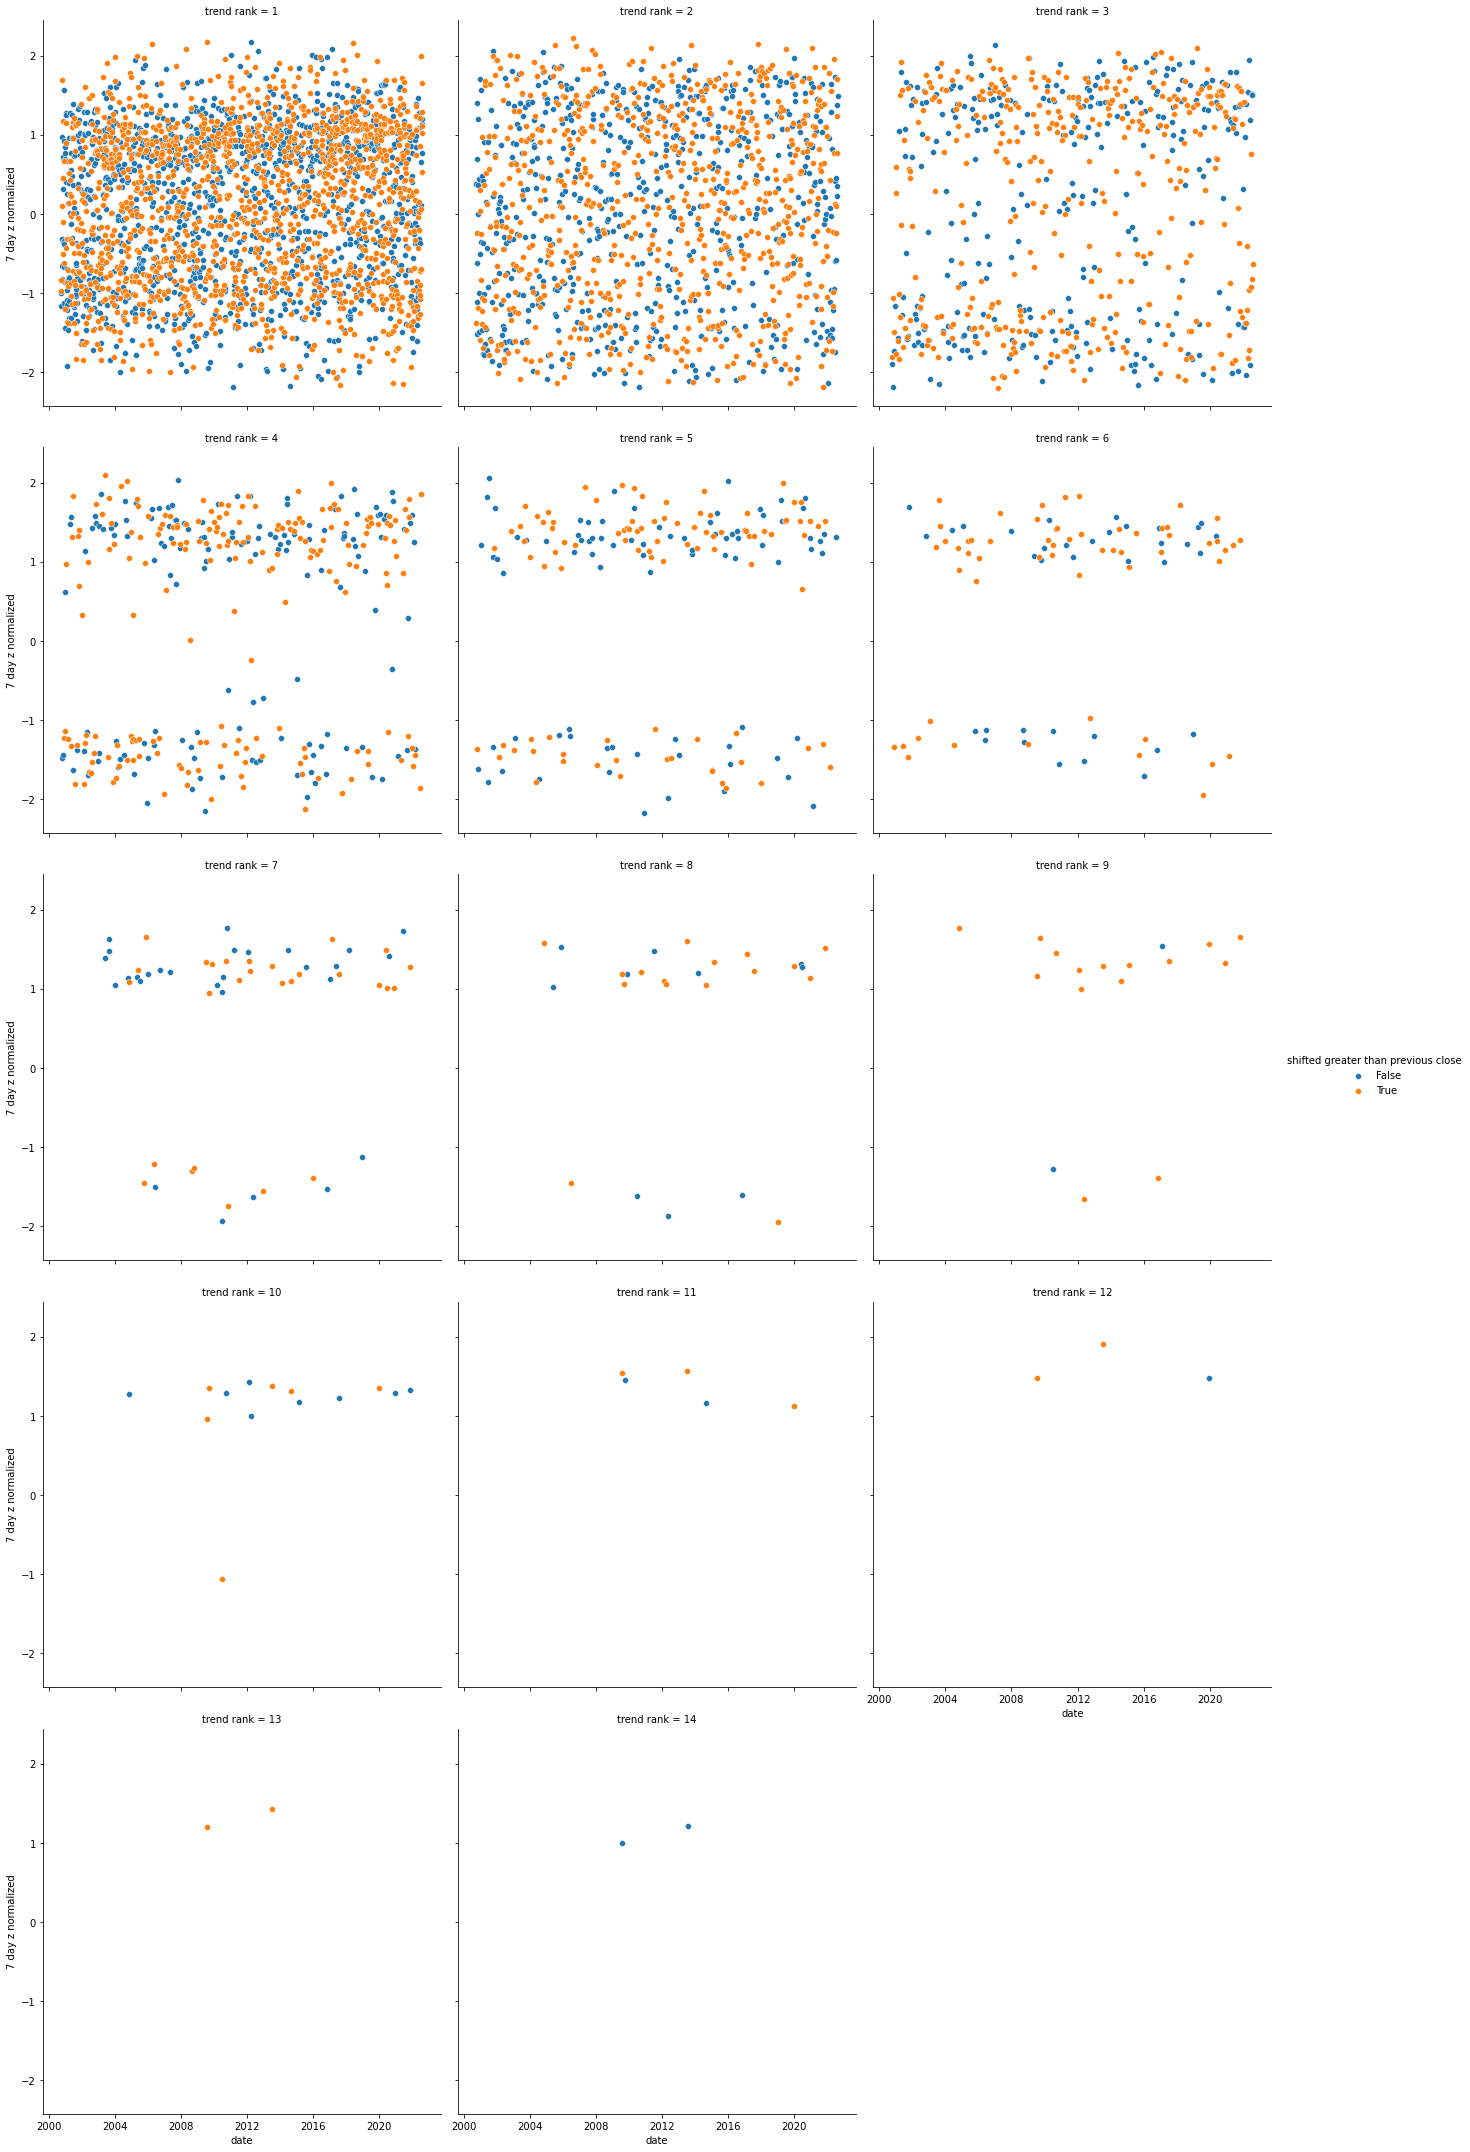

In [212]:
# Z norm score vs. future close by trend rank

plt.figure(figsize=(16,6), dpi = 200)
g = sns.FacetGrid(df, col = "trend rank", hue = 'shifted greater than previous close', col_wrap = 3, height = 6, aspect = 1)
g.map(sns.scatterplot, 'date', '7 day z normalized', alpha = 1)
g.add_legend()
plt.show()

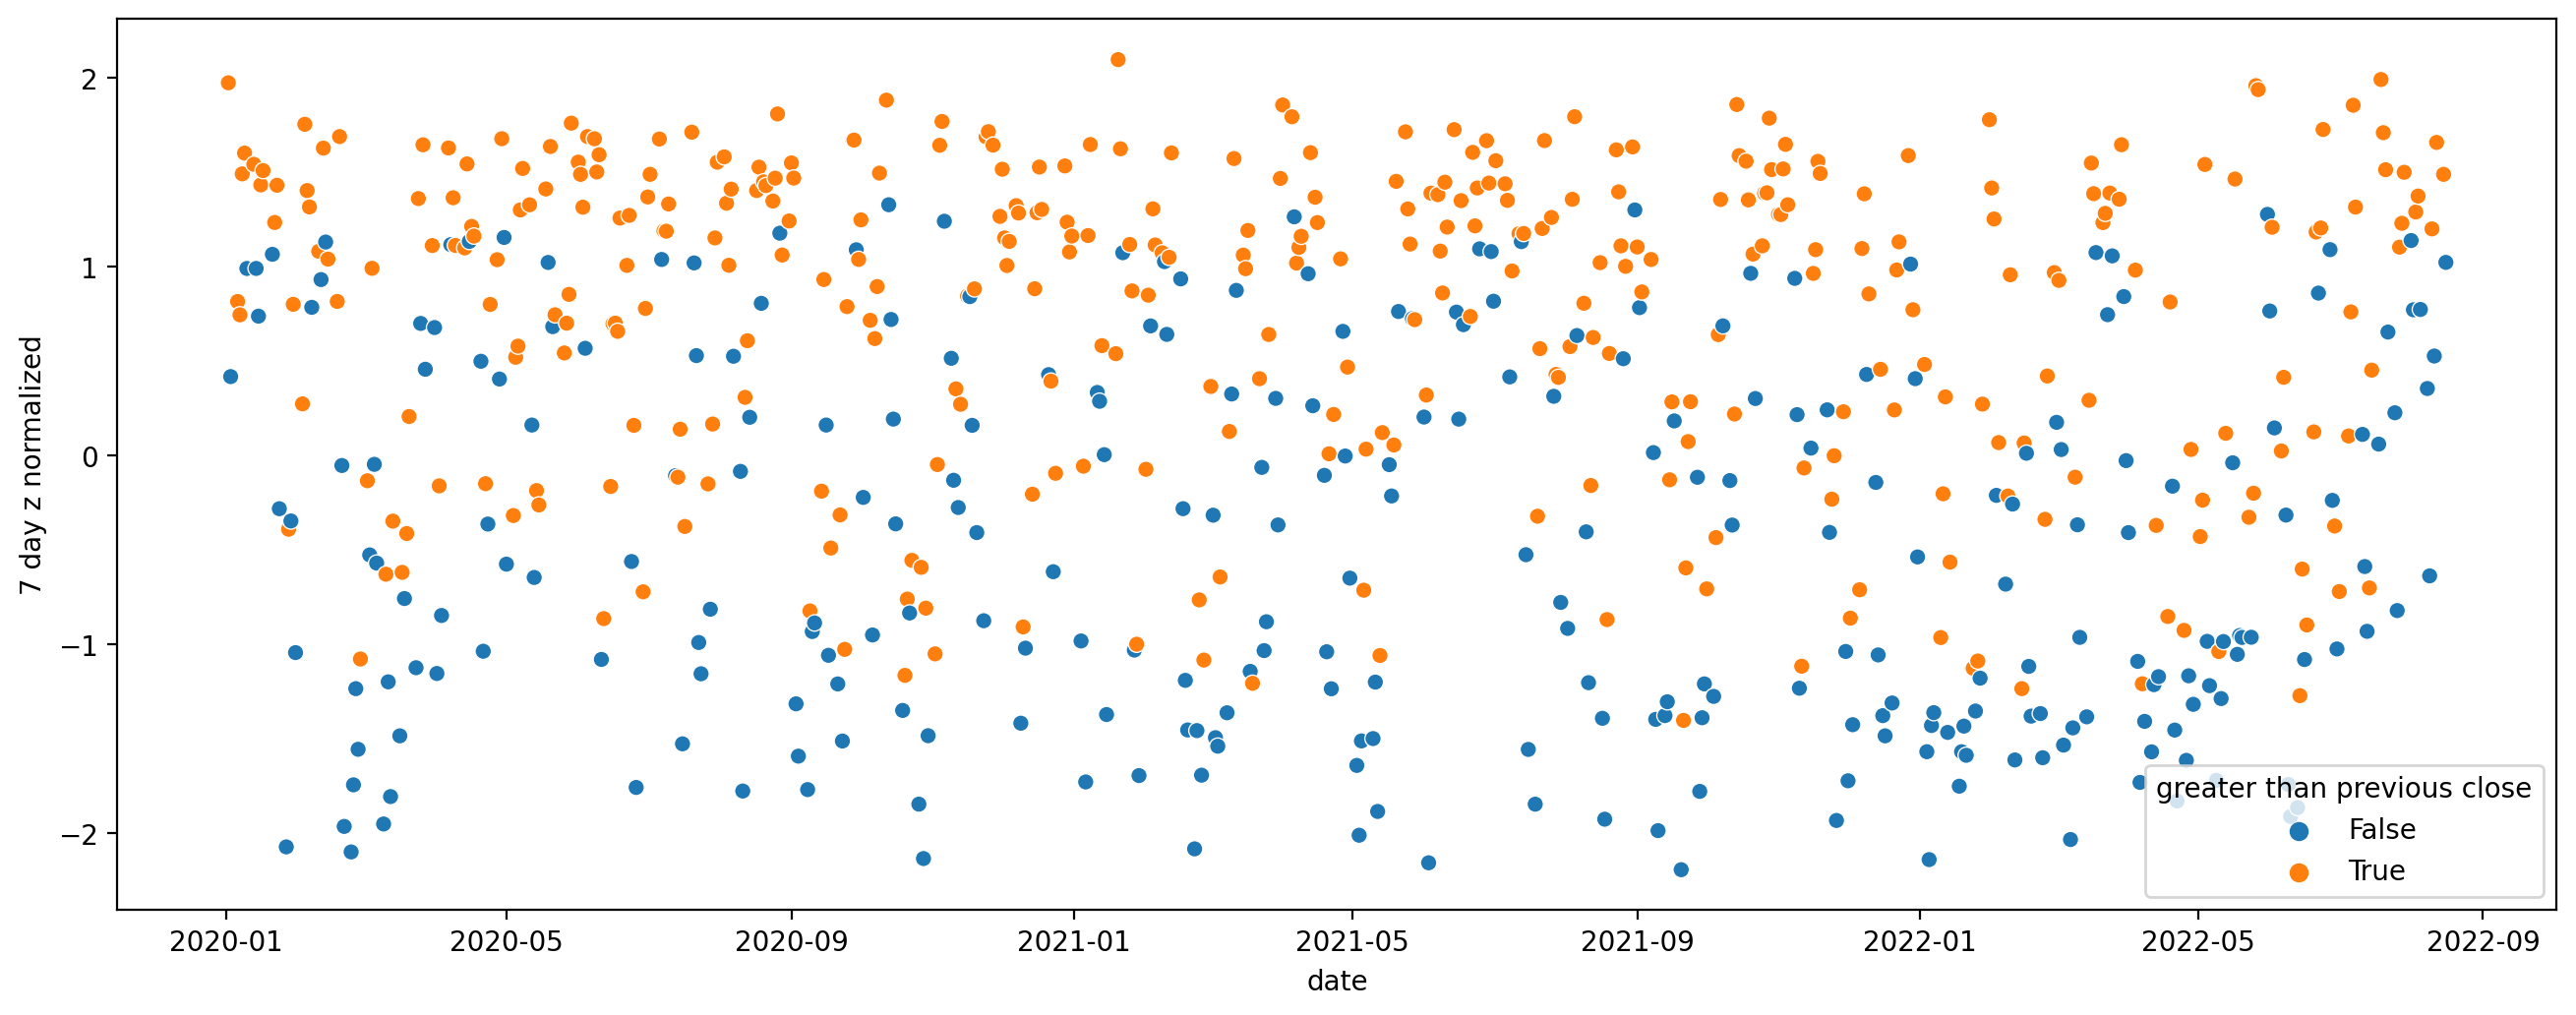

In [164]:
#Visualizing the Z norm score vs. whether the current period closed higher than the previous period

plt.figure(figsize=(16,6), dpi = 200)
# sns.FacetGrid(data = nq_df[nq_df['date'] > "2020"])
sns.scatterplot(data = df[df['date'] > "2020"], x = 'date', y = '7 day z normalized',hue = 'greater than previous close')
# sns.lineplot(data = nq_df[nq_df['date'] > "2020"], x = 'date', y = 'close')


plt.show()

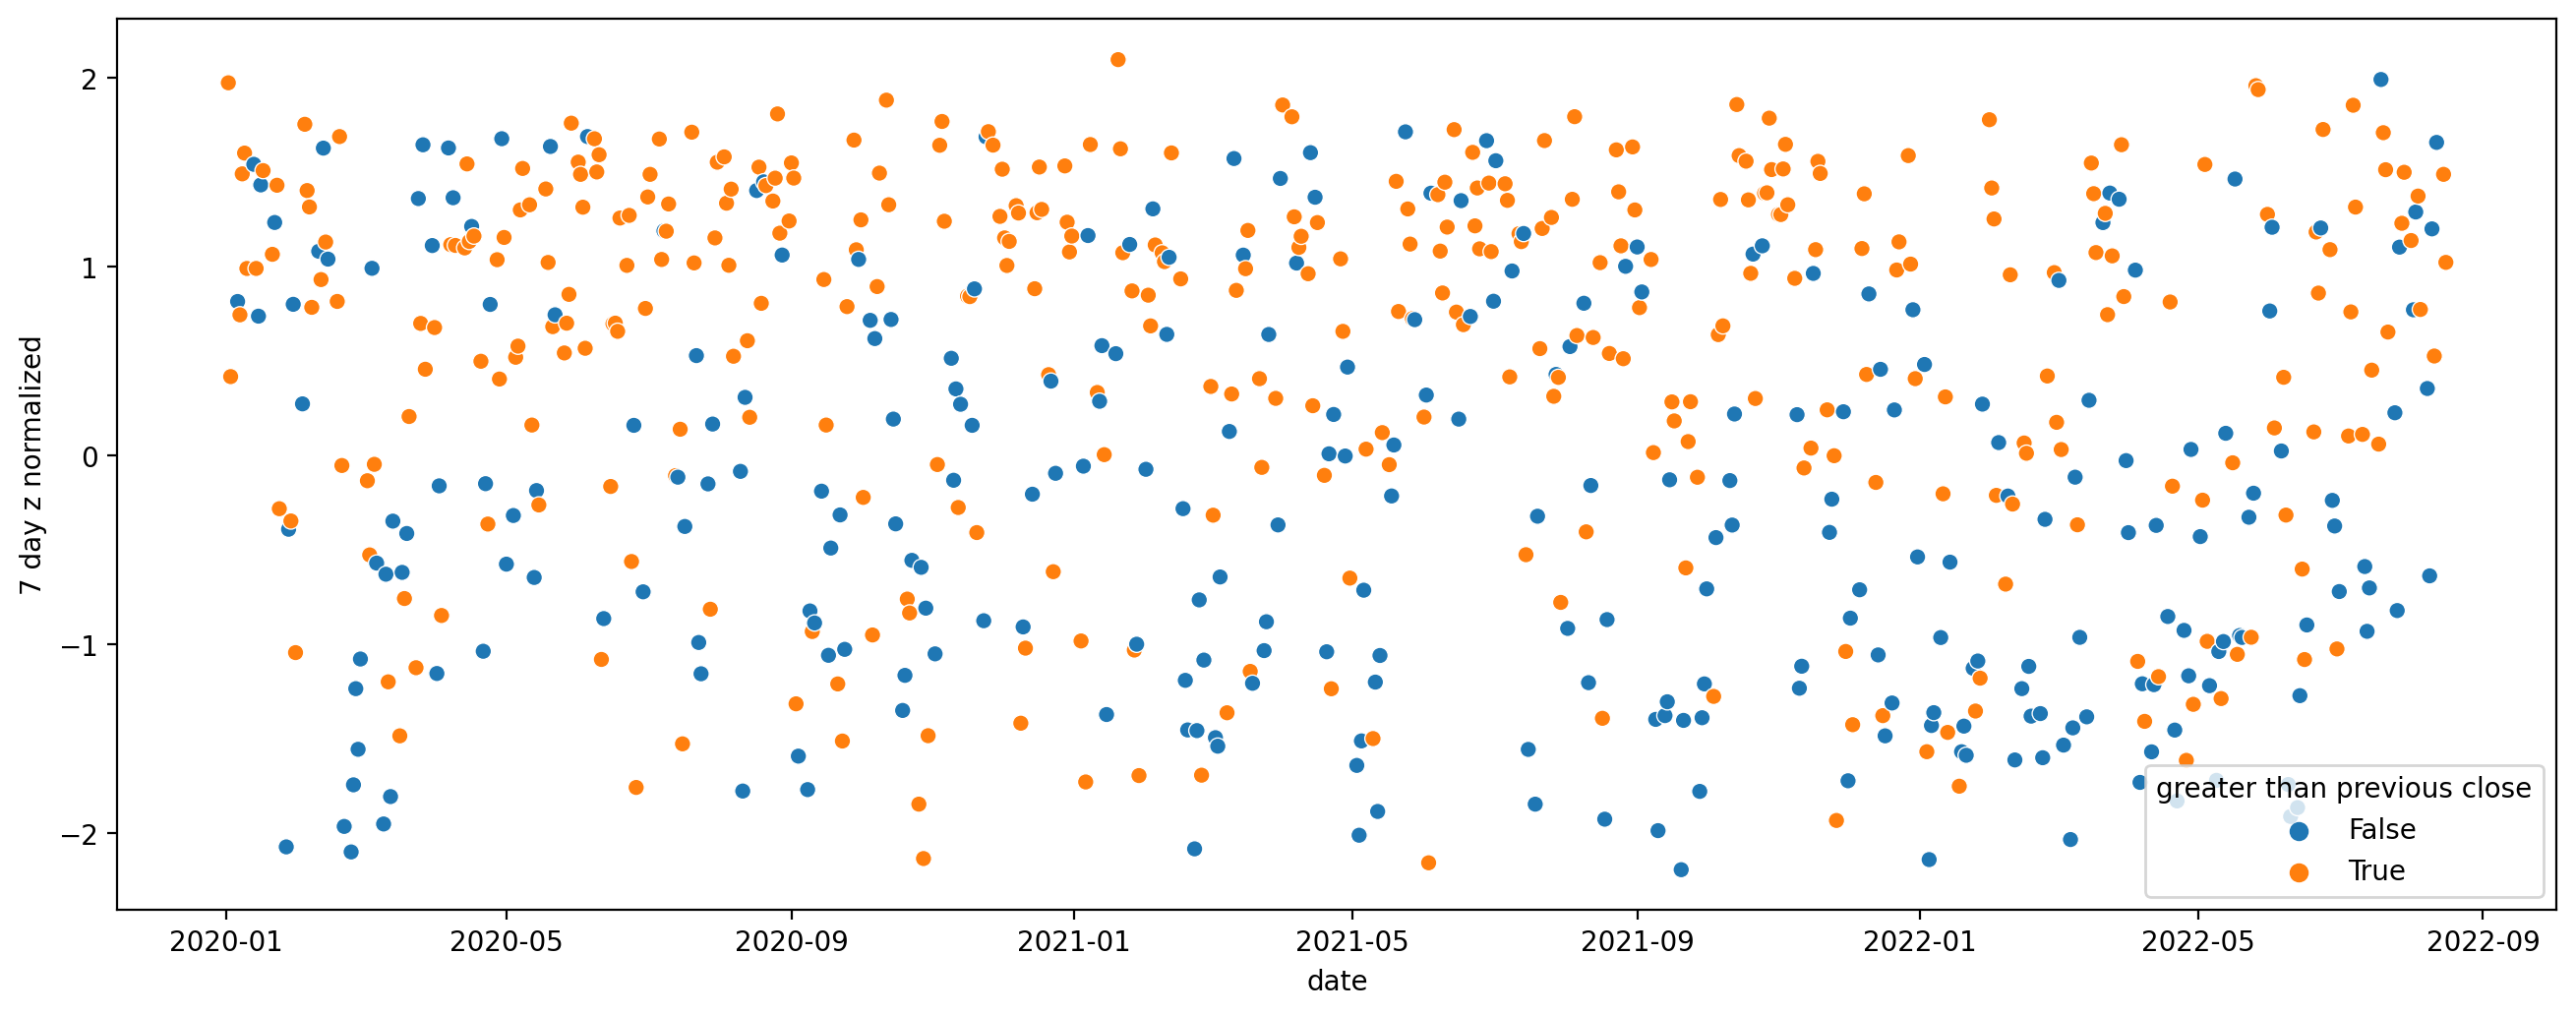

In [16]:
#Shifted the greater than previous close bool back 1 period which indicates whether the future period closed higher than the 
#current period allows me to visual the whether tomorrow closed higher than today based on z normalization score
plt.figure(figsize=(16,6), dpi = 200)
sns.scatterplot(data = df[df['date'] > "2020"], x = 'date', y = '7 day z normalized',\
                hue = df['greater than previous close'].shift(1),palette = 'tab10')
plt.show()

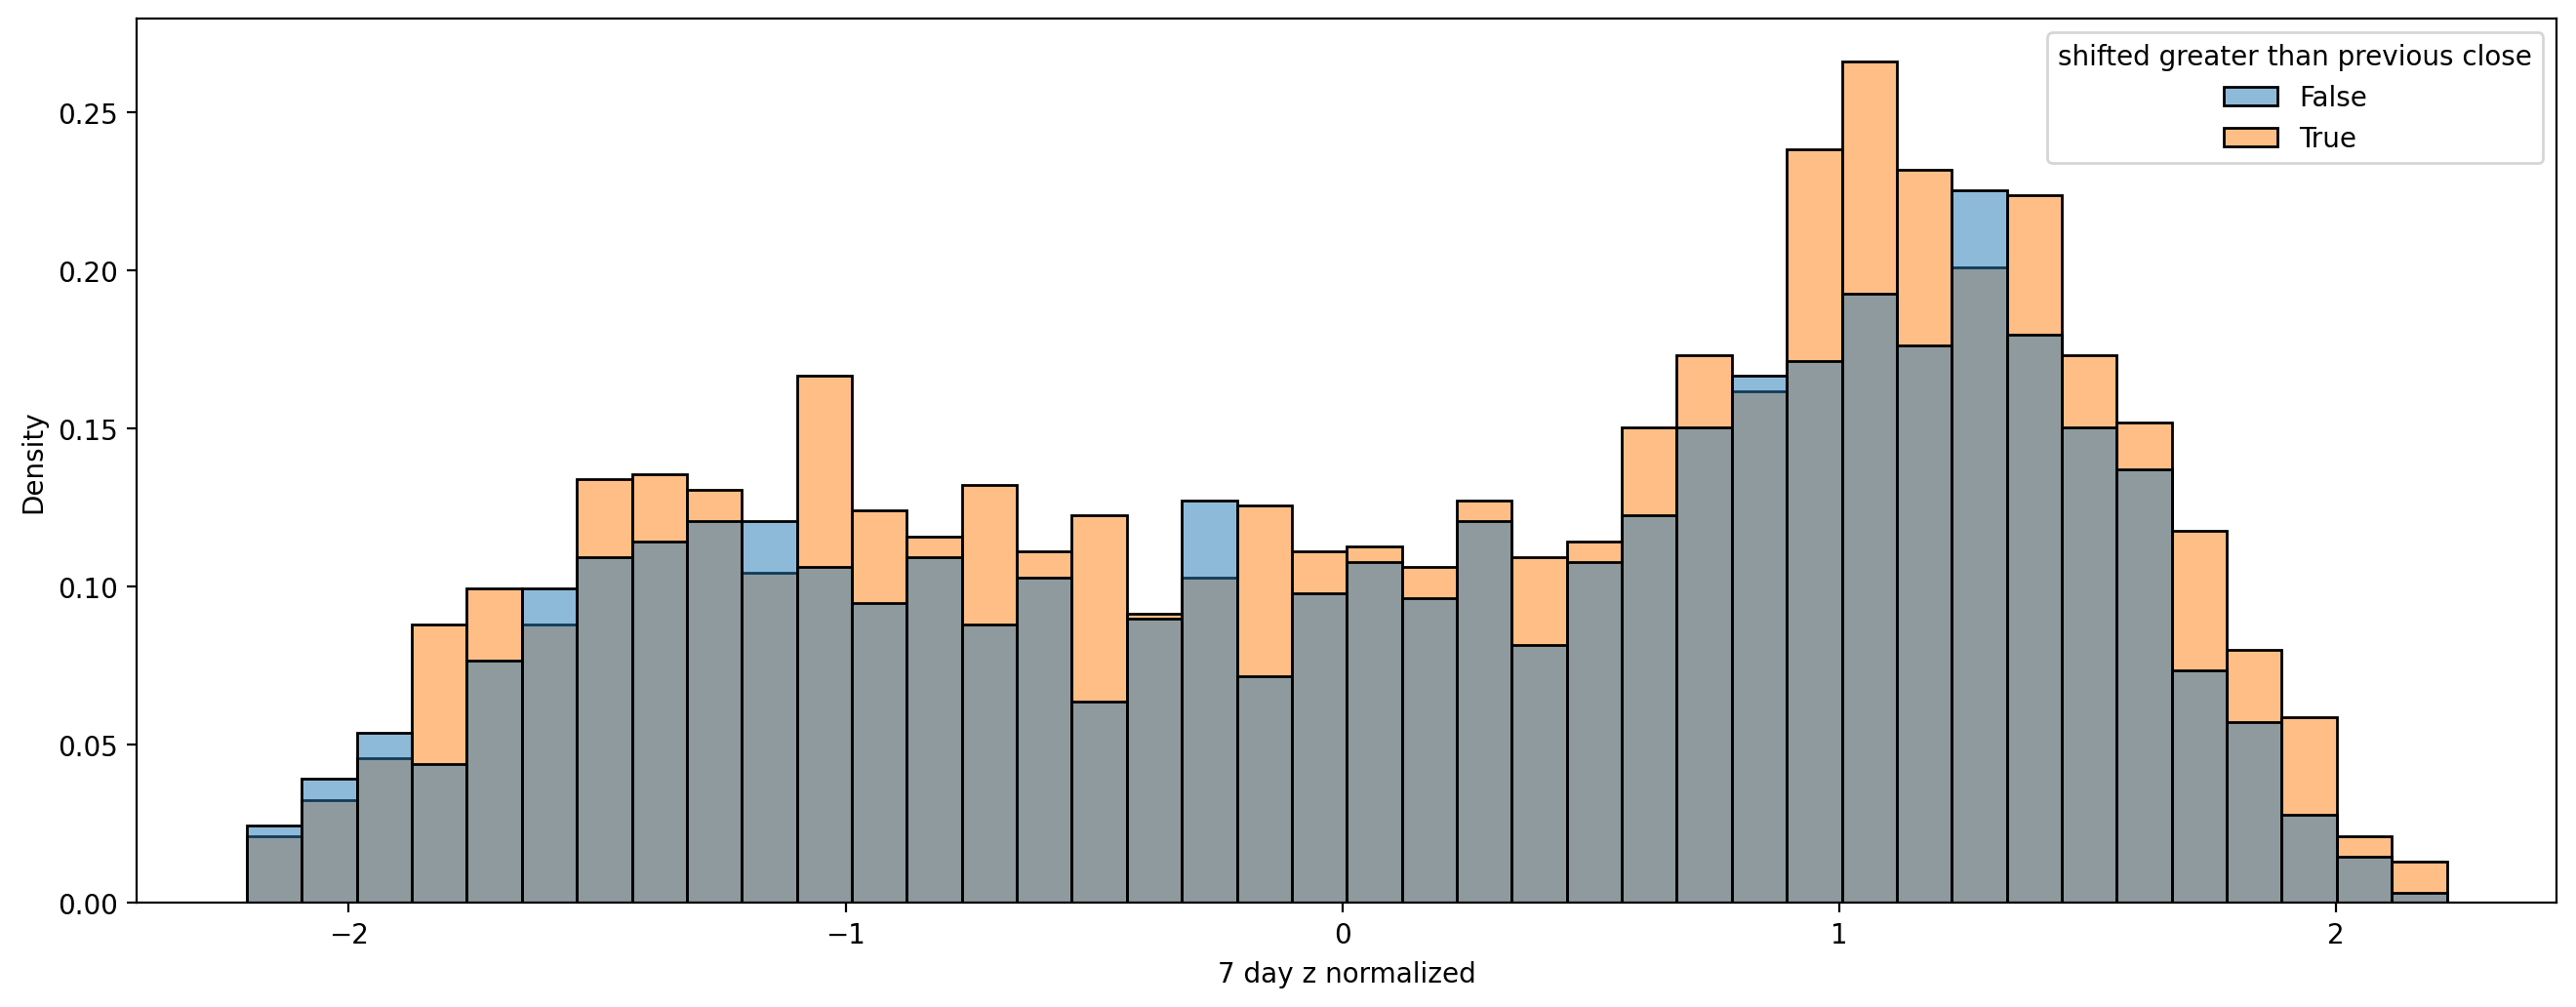

In [239]:
#Shifted the greater than previous close bool back 1 period which indicates whether the future period closed higher than the 
#current period allows me to visual the whether tomorrow closed higher than today based on z normalization score

# If there was a optimal z score to to indicate future probability of a winnning day we would be able to see it below.

plt.figure(figsize=(16,6), dpi = 200)
# sns.histplot(data  = nq_df, x = '7 day z normalized', hue = nq_df['greater than previous close'], palette = 'tab10')
sns.histplot(data  = df, x = '7 day z normalized', hue = df['shifted greater than previous close'], palette = 'tab10',\
             stat = 'density', bins = 40)
plt.show()

In [241]:
# Probability of future period close being higher in given range
df[(df['7 day z normalized'] <= 1.1) & (df['7 day z normalized'] >= .9)].value_counts("shifted greater than previous close")\
/len(df[(df['7 day z normalized'] <= 1.1) & (df['7 day z normalized'] >= .9)])

shifted greater than previous close
True     0.574949
False    0.425051
dtype: float64

In [242]:
df[df['date'] > '2012']\
[['7 day normalized', '7 day z normalized','greater than previous close','shifted greater than previous close',\
  'volume', 'day of week', 'trend rank']].corr()

,7 day normalized,7 day z normalized,greater than previous close,shifted greater than previous close,volume,day of week,trend rank
7 day normalized,1.000000,-0.966181,-0.522669,0.000072,0.343628,0.017979,-0.137131
7 day z normalized,-0.966181,1.000000,0.558106,0.000892,-0.334847,-0.013315,0.142848
greater than previous close,-0.522669,0.558106,1.000000,-0.029457,-0.171712,-0.020231,0.175588
shifted greater than previous close,0.000072,0.000892,-0.029457,1.000000,-0.020316,-0.006755,0.017174
volume,0.343628,-0.334847,-0.171712,-0.020316,1.000000,0.045968,-0.095887
day of week,0.017979,-0.013315,-0.020231,-0.006755,0.045968,1.000000,0.003920
trend rank,-0.137131,0.142848,0.175588,0.017174,-0.095887,0.003920,1.000000


In [464]:
# Iterate through all 7 day normalized scores and create a True False probability data frame for the likely hood of the future
# period closing higher than the current period

a = pd.DataFrame(columns = [True, False] )
new_index = []
length = []
 
for i in np.arange(df['7 day z normalized'].min(), df['7 day z normalized'].max(),.1):
    x = df[(df['7 day z normalized'] >= round(i,2)) & (df['7 day z normalized'] <= round((i+.2),2))]\
    ['shifted greater than previous close'].value_counts(normalize = True).to_frame().transpose()
    a = pd.concat([a,x], axis = 0, join = 'outer', ignore_index = True)
    new_index.append(f"{round(i,3)} to {(round((i+.2),3))}")
    length.append(len(df[(df['7 day z normalized'] >= round(i,2)) & (df['7 day z normalized'] <= round((i+.2),2))]\
    ['shifted greater than previous close']))


a.index = new_index
a['length'] = length



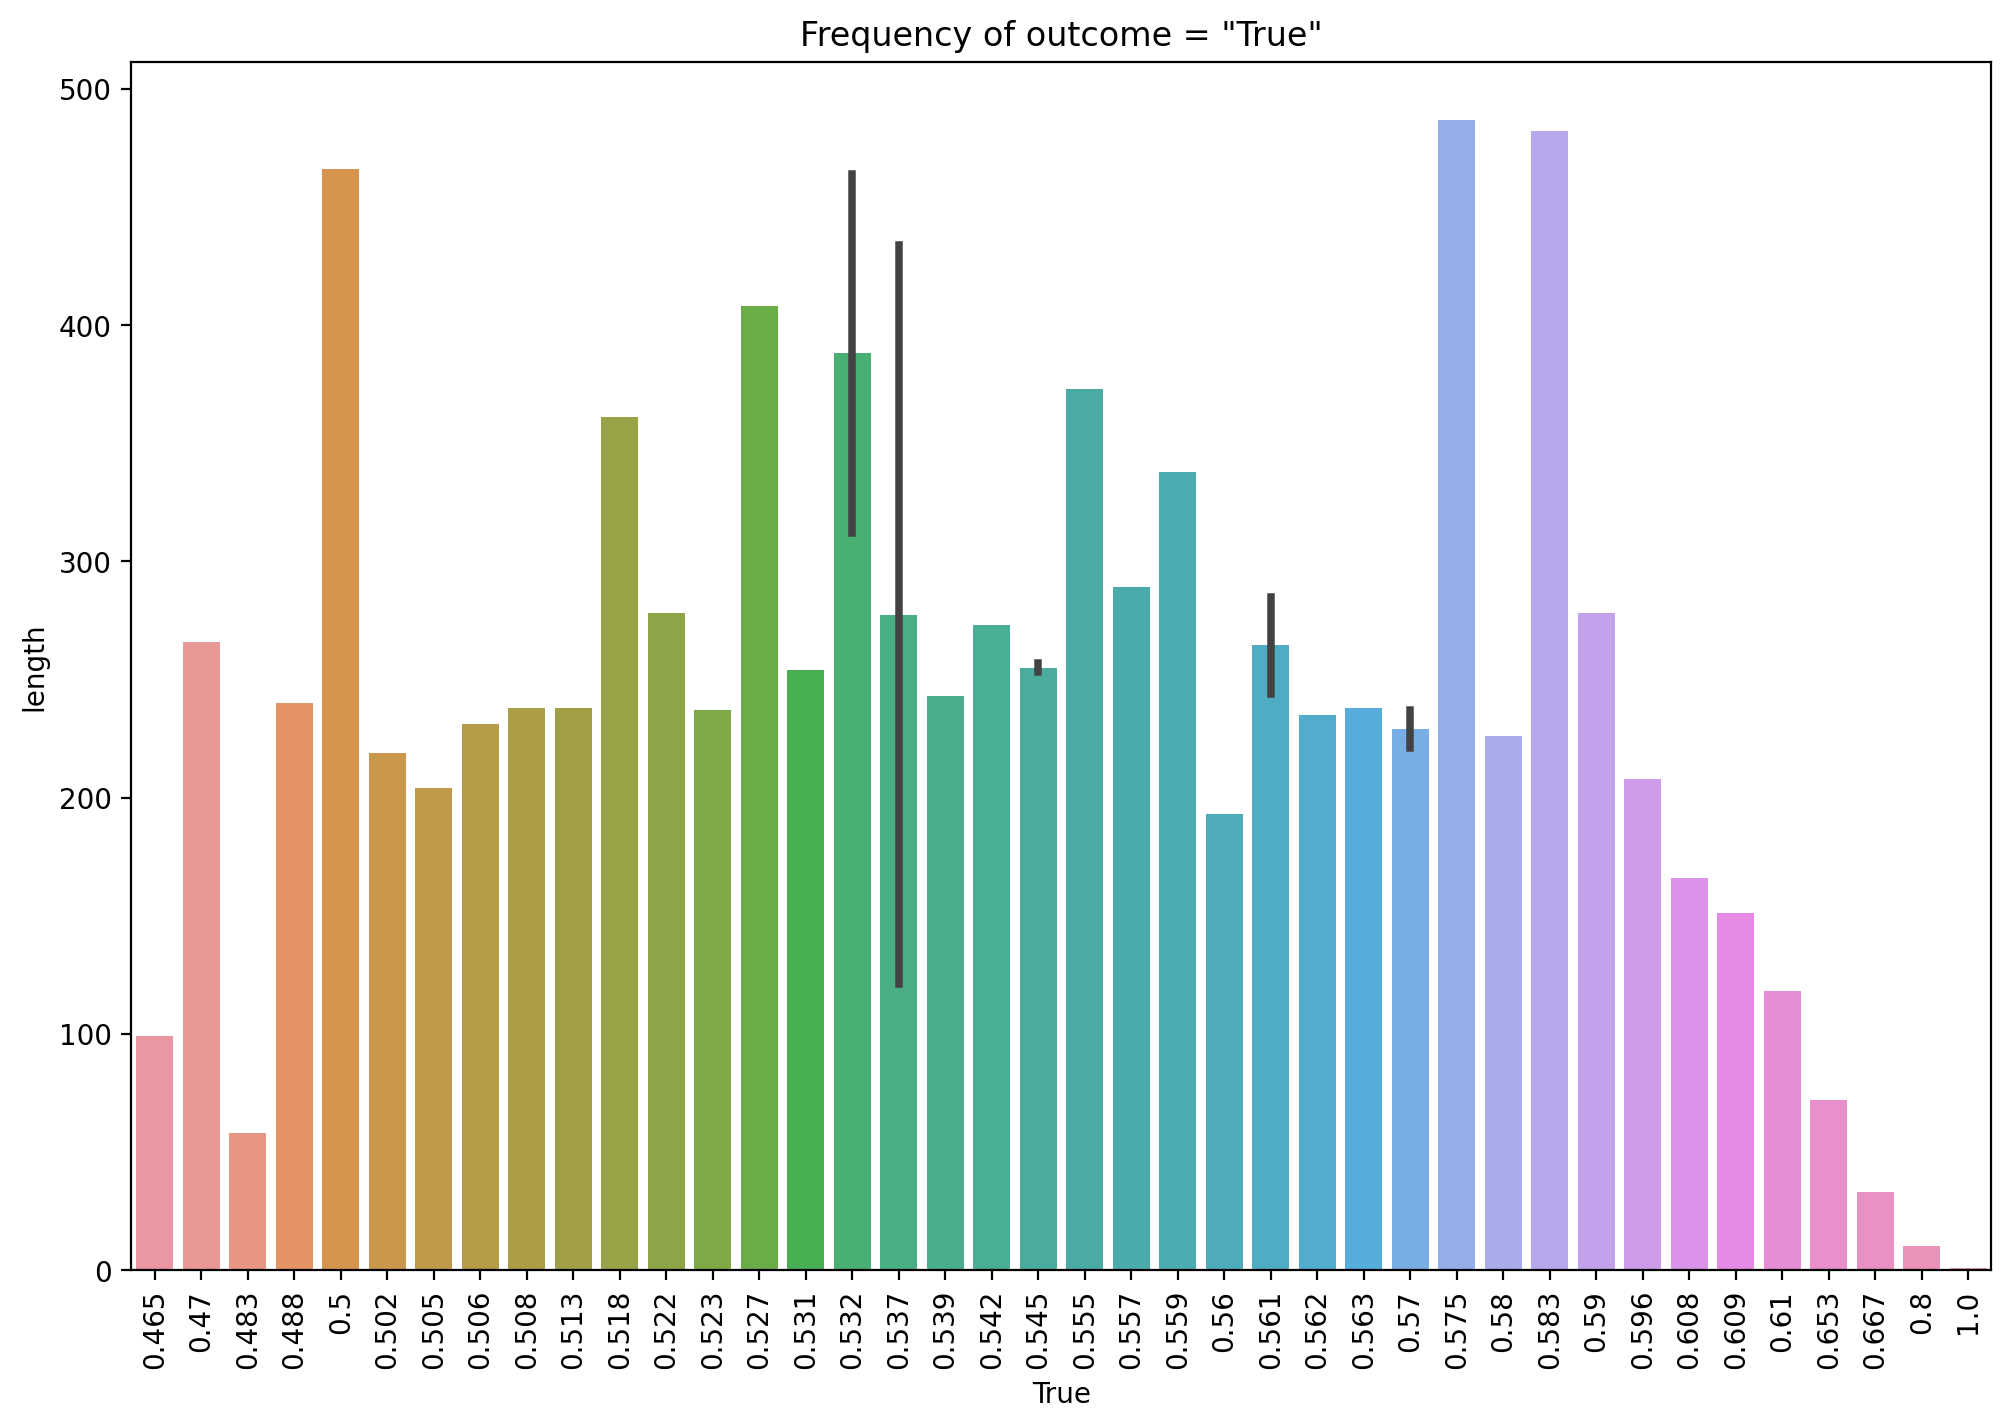

In [468]:
# Barplot indicating "True" outcome frequencies cross reference with a.dataframe to identify z score bins with highest True
# probability and frequency

plt.figure(figsize = (12,8), dpi = 200)
sns.barplot(data = a, x = round(a[True],3), y = 'length')
plt.xticks(rotation = 90)
plt.title('Frequency of outcome = "True"')
plt.show()

In [475]:
df.tail(30)

,date,open,high,low,close,adj close,volume,7 day normalized,7 day z normalized,greater than previous close,trend rank,shifted greater than previous close,day of week
5508,2022-07-06,11820.25,11974.25,11727.75,11880.25,11880.25,649912,-0.686399,0.760294,True,3,True,2
5509,2022-07-07,11901.25,12168.50,11836.50,12138.50,12138.50,550463,-1.000000,1.854584,True,4,True,3
5510,2022-07-08,12115.00,12211.00,11952.50,12152.00,12152.00,640445,-1.000000,1.315226,True,5,False,4
5511,2022-07-11,12149.75,12149.75,11853.00,11884.25,11884.25,578336,-0.569880,0.111726,False,1,False,0
5512,2022-07-12,11900.50,12025.50,11712.00,11779.00,11779.00,607949,-0.310217,-0.587973,False,2,False,1
5513,2022-07-13,11780.00,11970.00,11479.25,11762.25,11762.25,732270,-0.000000,-0.930985,False,3,True,2
5514,2022-07-14,11729.50,11835.00,11511.25,11797.50,11797.50,654560,-0.090443,-0.701220,True,1,True,3
5515,2022-07-15,11810.50,12021.50,11740.25,12007.50,12007.50,560980,-0.629250,0.451967,True,2,False,4
5516,2022-07-18,12043.50,12186.50,11857.00,11907.00,11907.00,553676,-0.371392,0.060239,False,1,True,0
5517,2022-07-19,11909.50,12328.50,11889.50,12274.00,12274.00,585591,-1.000000,1.990948,True,1,True,1


In [472]:
df['trend rank'].shift(-1)

0       1.0
1       2.0
2       1.0
3       1.0
4       1.0
       ... 
5533    1.0
5534    1.0
5535    2.0
5536    1.0
5537    NaN
Name: trend rank, Length: 5538, dtype: float64

In [482]:
df[(df['trend rank'].shift(-1) == 1) & (df['trend rank'] != 1) ]['trend rank'].value_counts()

2     679
3     329
4     168
5      85
6      37
7      30
8       9
10      9
9       3
11      2
14      2
12      1
Name: trend rank, dtype: int64

In [492]:
len(df[df['trend rank'] == 2])

1354

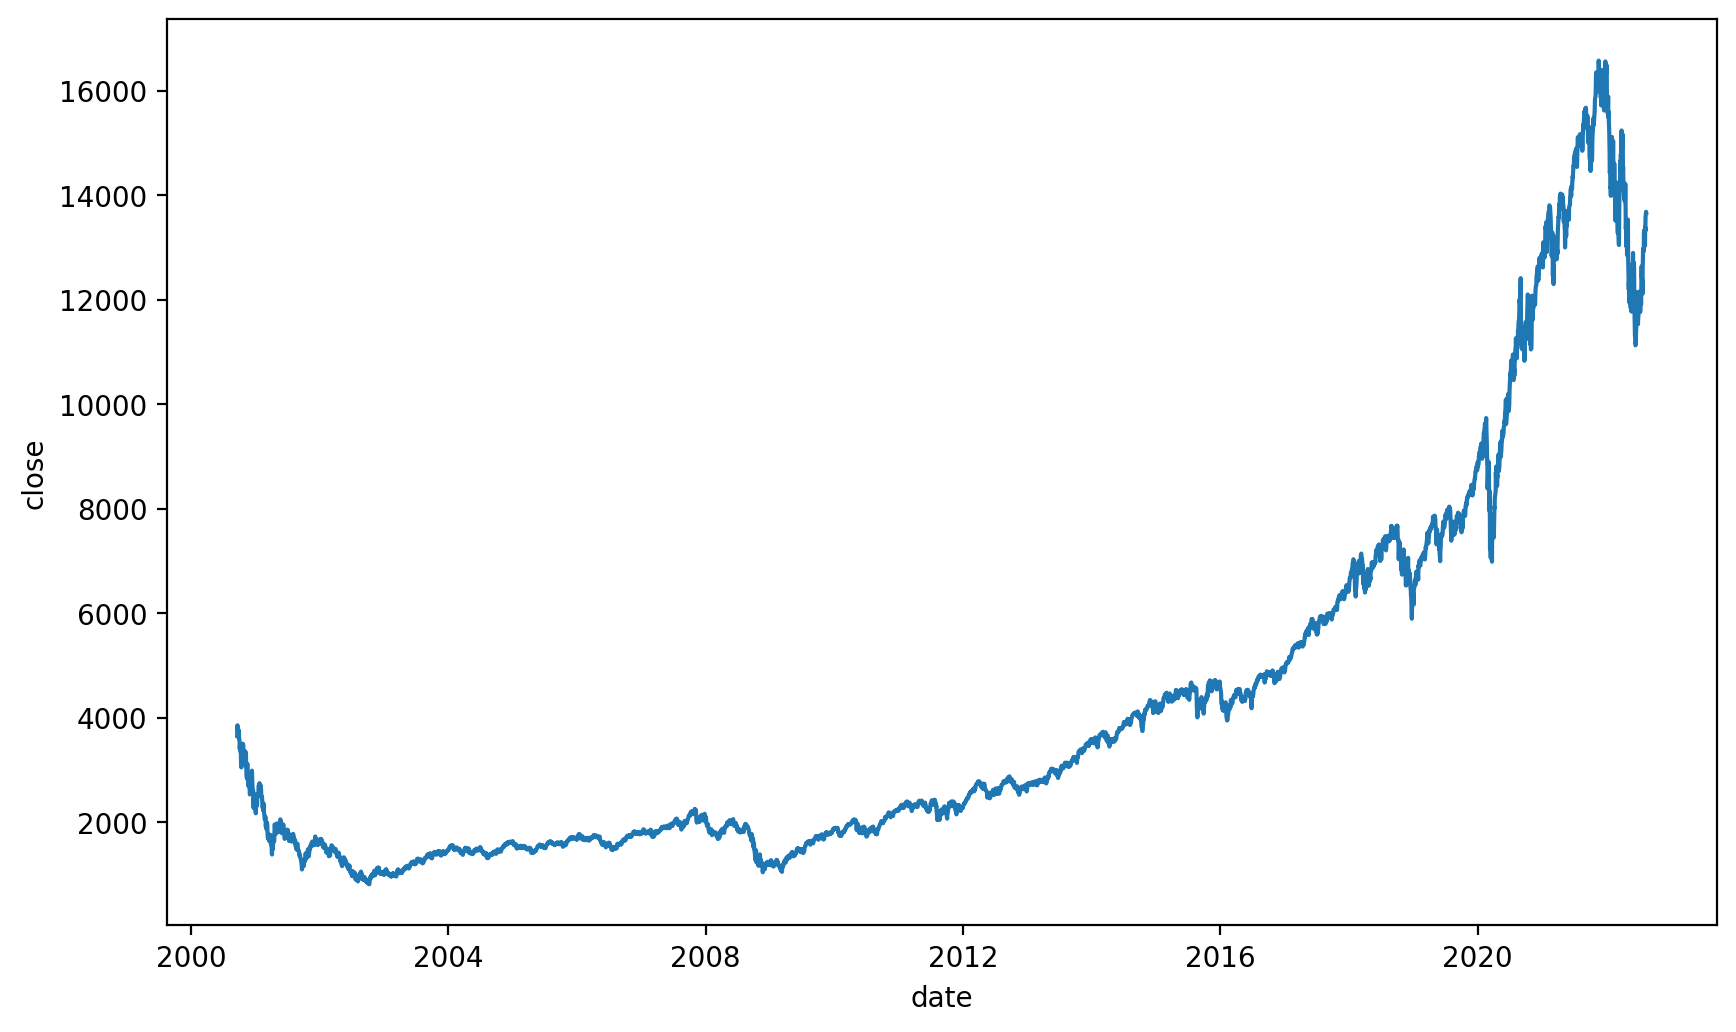

In [21]:
plt.figure(figsize=(10,6), dpi = 200)
sns.lineplot(data=df, x = 'date', y = 'close')
# sns.lineplot(data=nq_df, x = nq_df.index, y = 'Volume')
# sns.lineplot(data=nq_df, x = nq_df.index, y = 'High')
plt.show()

Hypothesis:
You can predict the future stock price to increase by x (5, 10, 15 points) points with a greater than 60% probability of being correct.

Create a signal script to determine if a stock should be purchased and sold on the next trading day.

1) Normalize price for 2, 3, 4, n... day periods.
2) Create a Target value column with the intended outcome (e.g. 5 point increase from previous day etc. possibly True/False value) 
2a) Create second target value column with a maximum adverse excursion value penalty (e.g. 5 point increase from previous day without decrease more than 5 points from previous day close)
3) Use ML to predict likely outcome of target value column with various normalized nday price periods

